In [1]:
%matplotlib inline
%pylab inline

matplotlib.use('TkAgg')

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: matplotlib.pyplot as already been imported, this call will have no effect.
  after removing the cwd from sys.path.


In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#Importing Data from the CSV file
import os
os.chdir("/home/ayushi/coursework/col774/Machine-Learning-Assignments/Assignment1/data/q1")
print("Path has been changed to:\n", os.getcwd())

#Importing Data X from the CSV file
X = np.genfromtxt('linearX.csv', delimiter='\n')

#Reshape X to add the Intercept term. Since n=1 here, X should be a 2x100 matrix. 
X=np.reshape(X, (-1,1))
X= np.append(np.ones((X.shape)), X, axis=1)
#print(X.shape)

#Importing Data Y from the CSV file
Y = np.genfromtxt('linearY.csv', delimiter='\n')
Y = np.reshape(Y, (-1,1))
#print(Y.shape)

os.chdir("/home/ayushi/coursework/col774/Machine-Learning-Assignments/Assignment1/ques1")
print("Path changed back to python file directory:\n", os.getcwd())

m = X.shape[0] # Number of training samples
n = X.shape[1] # Number of features + intercept
#print(m,n)

Path has been changed to:
 /home/ayushi/coursework/col774/Machine-Learning-Assignments/Assignment1/data/q1
Path changed back to python file directory:
 /home/ayushi/coursework/col774/Machine-Learning-Assignments/Assignment1/ques1


In [1]:
#Normalization of the Input X
mean = np.mean(X[0:101,1])
var = np.std(X[0:101,1])
#print(mean, var)
X[0:101,1] -= mean
X[0:101,1] /= var
#print(np.mean(X), np.std(X))

NameError: name 'np' is not defined

In [5]:
#parameter initialization
theta = np.zeros((2,1)) #initialize to zero (Can be random as well)
alpha = 0.01 # Learning Rate
print("Learning Rate=", alpha)

Learning Rate= 0.01


In [6]:
#define the hypothesis function
def hypothesis(X, theta):
    return np.dot(X, theta)


In [7]:
def cost(X, theta, Y):
    h_x= hypothesis(X, theta)
    cost = (1/(2*m)) * np.sum((Y-h_x)**2) # Average Cost Function
    return cost

cost_start = cost(X, theta, Y)
print("Initial Cost value for the hypothesis with zero parameters={}".format(cost_start))

Initial Cost value for the hypothesis with zero parameters=0.4966279047145


In [8]:
#function for calculating the cost function gradient

def cost_grad(X, theta, Y):
    temp = np.dot(X, theta)-Y
    theta_grad = np.zeros((2,1))
    theta_grad += np.dot(X.transpose(), temp)
    return theta_grad/m                       #average Gradient 
    

In [10]:
#Method 3 - With Normalization, and termination based on change in the cost function
i=0
cost_list= np.array([cost_start])
theta_all = theta
#print(theta_all)
while(abs(cost_grad(X, theta, Y)[1]) >= 0.00000001):
    theta_all = np.append(theta_all,theta,axis=1)
    theta -= alpha * cost_grad(X, theta, Y)
    cost_final = cost(X, theta, Y)
    cost_list = np.append(cost_list, cost_final)
    i+=1

print("Cost is = {} in iterations = {}".format(cost_final, i))

Cost is = 1.1948172733134156e-06 in iterations = 1175


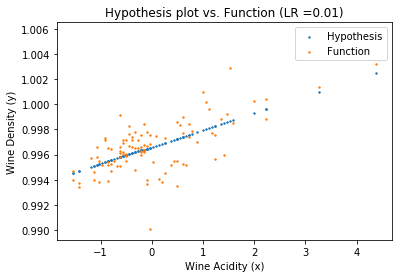

In [11]:
yhyp = np.dot(X, theta)
plt.scatter(X[0:100,1], yhyp, s = 2, label='Hypothesis')
plt.scatter(X[0:100,1], Y, s = 2, label='Function')
plt.legend()
plt.title('Hypothesis plot vs. Function (LR =0.01)')
plt.xlabel('Wine Acidity (x)')
plt.ylabel('Wine Density (y)')
#plt.show()
plt.savefig('plot_hyp_lr_0.01.png', dpi=1000, bbox_inches='tight')

/home/ayushi/.local/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


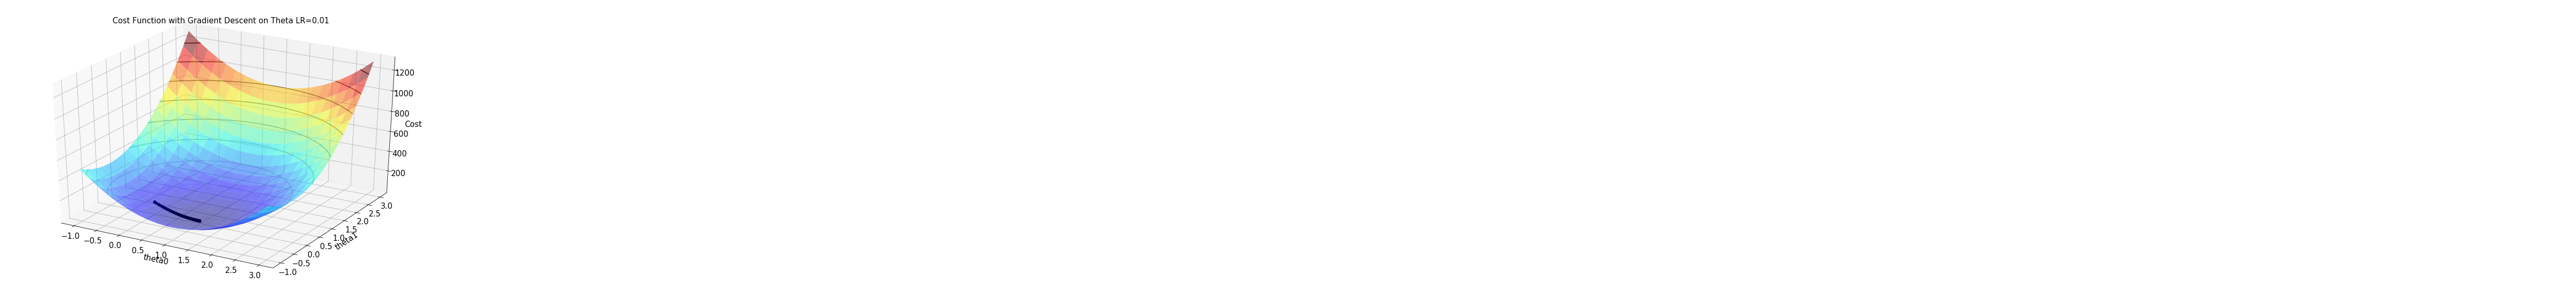

In [14]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
from matplotlib import cm
import collections

def error(t0, t1, points):
    temp_theta=np.array([[t0],[t1]])
    temp_hx=np.dot(points[0].x, temp_theta)
    totalError = np.sum((points[0].y - temp_hx) ** 2)
    return totalError

x = X
y = Y
#Create a set of points for (X, Y) 
Point = collections.namedtuple('Point', ['x', 'y'])
points = [Point(x, y)]

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
ax.set_title("Cost Function with Gradient Descent on Theta LR=0.01", fontsize=15)

#Create a theta space for calculating the cost function
theta0 = np.linspace(-1.0,3.0, 20)
theta1 = np.linspace(-1.0,3.0, 20)
theta0, theta1 = np.meshgrid(theta0, theta1)
#calculate cost function for the combination of theta0 and theta1
cost_error = np.array([error(t0, t1, points) 
               for t0, t1 in zip(np.ravel(theta0), np.ravel(theta1))])
cost_plot = cost_error.reshape(theta0.shape)

#Plot scatter for actual theta's

theta_all0 = theta_all[0][0::5]
theta_all1 = theta_all[1][0::5]

theta_all0, theta_all1 = np.meshgrid(theta_all0,theta_all1)
cost_error = np.array([error(t0, t1, points) 
               for t0, t1 in zip(np.ravel(theta_all0), np.ravel(theta_all1))])
cost_actual = cost_error.reshape(theta_all0.shape)

ax.plot_surface(theta0, theta1, cost_plot, rstride=1, cstride=1, alpha=0.5, cmap=cm.jet)
ax.set_xlabel('theta0', fontsize=15)
ax.set_ylabel('theta1', fontsize=15)
ax.set_zlabel('Cost', fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=15)

ax.contour3D(theta0, theta1, cost_plot, 10, cmap='binary')
#ax.scatter(theta_all0, theta_all1, cost_actual, c='red', marker='o', s=1, depthshade=True)

graph = ax.scatter([], [], [], marker='o', c='k', s=25)
graph.set_alpha(1)
xdata, ydata, zdata = [], [], []

def animate(i):
    xdata.append(np.ravel(theta_all0)[i])
    ydata.append(np.ravel(theta_all1)[i])
    zdata.append(np.ravel(cost_actual)[i])
    graph._offsets3d = (xdata, ydata, zdata)
    return graph

anim = FuncAnimation(fig, animate, frames=np.arange(0, 100), interval=200, repeat_delay=3000, blit=False)
anim.save('plot_cost_lr_0.01.gif', writer='imagemagick')
#HTML(anim.to_html5_video())

/home/ayushi/.local/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


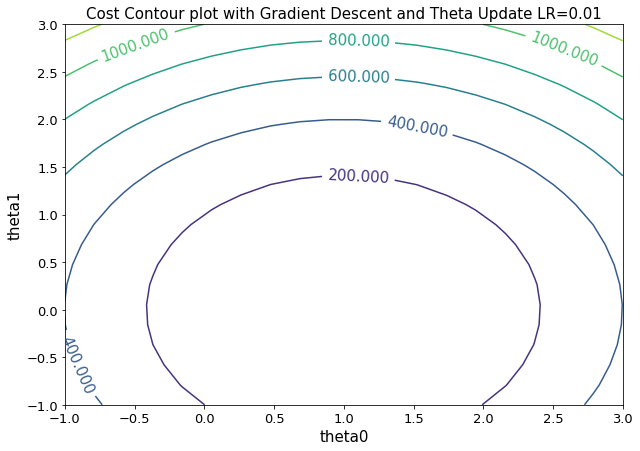

In [15]:
from IPython.display import HTML

x = theta0
y = theta1
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
cp=ax.contour(x,y,cost_plot)
ax.clabel(cp, inline=1, fontsize=15)
ax.set_xlabel('theta0', fontsize=15)
ax.set_ylabel('theta1', fontsize=15)
ax.set_title("Cost Contour plot with Gradient Descent and Theta Update LR=0.01", fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=13)

points, = ax.plot([], [], marker='o', c='m', markersize=8)
xdata, ydata = [], []
def init():
    points.set_data([], [])
    return points,
def animate_c(i):
    xdata.append(np.ravel(theta_all0)[i])
    ydata.append(np.ravel(theta_all1)[i])
    points.set_data(xdata, ydata)
    return points,

anim1 = FuncAnimation(fig, animate_c, init_func=init,
                               frames=np.arange(0, 100), interval=200, repeat_delay=3000, blit=False)
#HTML(anim.to_html5_video())
anim1.save('plot_contour_lr_0.01.gif', writer='imagemagick')